# Employee Retention

## Goal

Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).


In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.


## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as average salary during her tenure, department, and years of experience.
As said above, the goal is to predict employee retention and understand its main drivers


In [34]:
#Data Analysis
import pandas as pd
import numpy as np
import missingno as msno

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data = pd.read_csv('../employee_retention.csv')
data.pop('Unnamed: 0')
data.describe()

,employee_id,company_id,seniority,salary
count,3.470200e+04,34702.000000,34702.000000,34463.000000
mean,6.466667e+05,4.023370,10.056625,100280.585004
std,3.337653e+05,2.911201,9.355505,87322.502536
min,3.600000e+01,1.000000,0.000000,5000.000000
25%,3.529228e+05,1.000000,0.000000,9302.000000
50%,7.063230e+05,3.000000,8.000000,88000.000000
75%,1.001324e+06,6.000000,18.000000,158000.000000
max,1.009999e+06,12.000000,99.000000,408000.000000


In [36]:
print(set(data.dept))
print(set(data.company_id))

{'design', 'sales', 'temp_contractor', 'engineer', 'data_science', 'marketing', 'customer_service'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


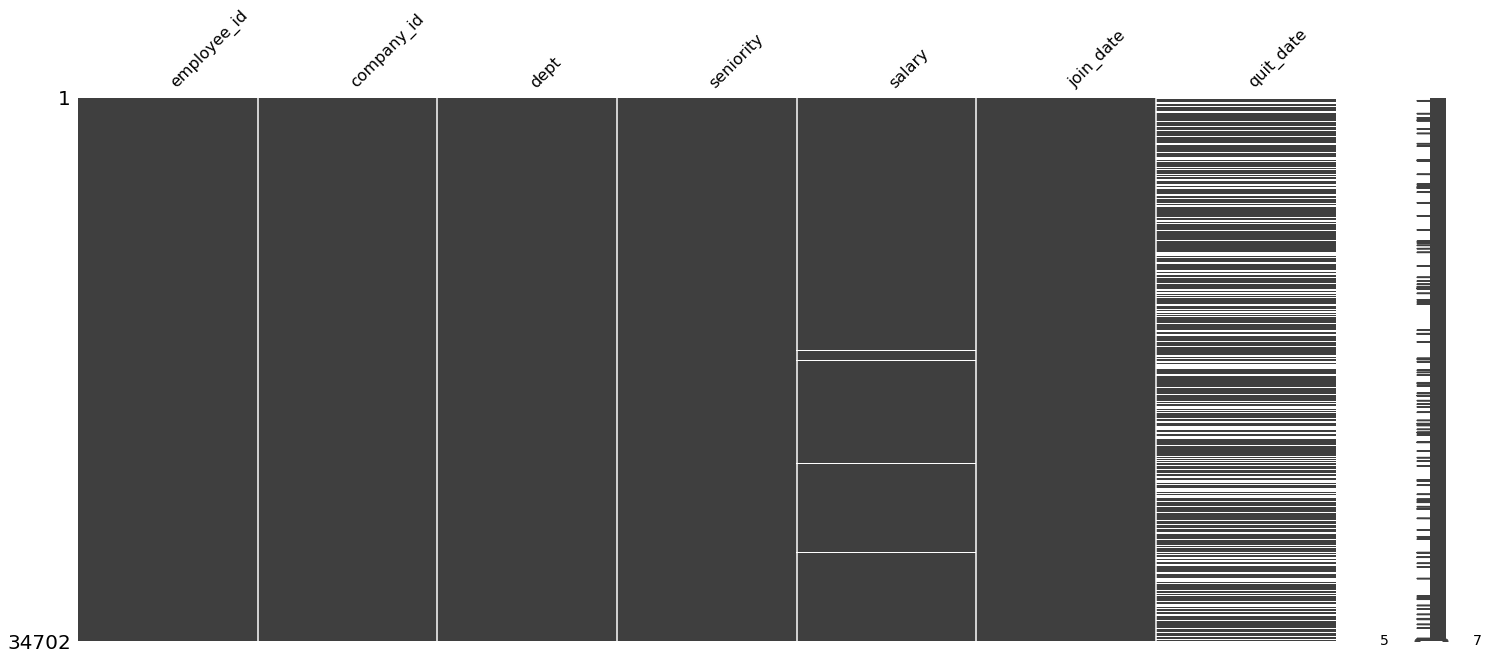

In [32]:
msno.matrix(data)

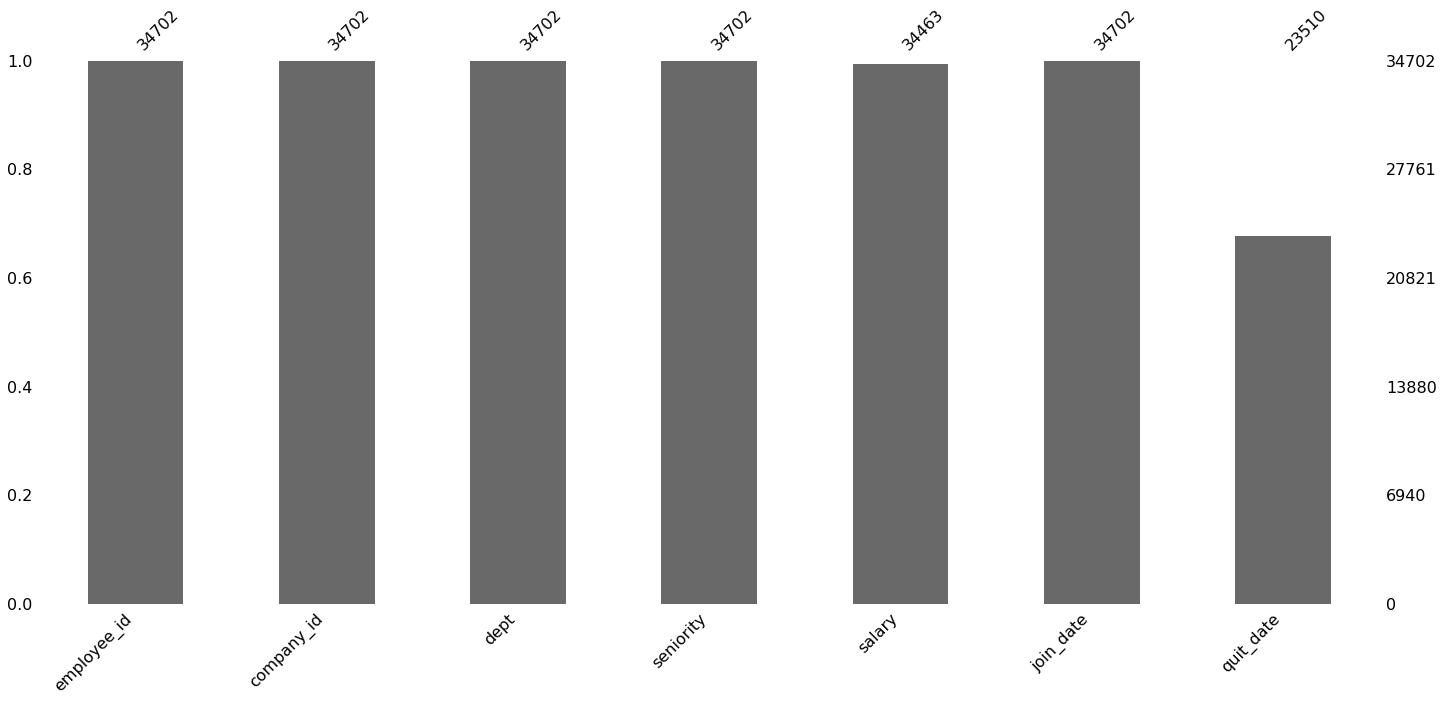

In [33]:
msno.bar(data)

## Salary by Company

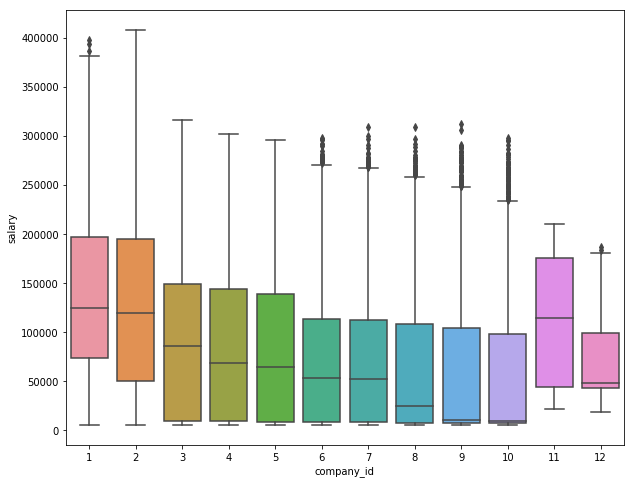

In [37]:
plt.figure(figsize=(10,8))
#sns.violinplot(data=data, x = "company_id", y="salary")
sns.boxplot(data=data, x="company_id", y= "salary")

## Salary by Department

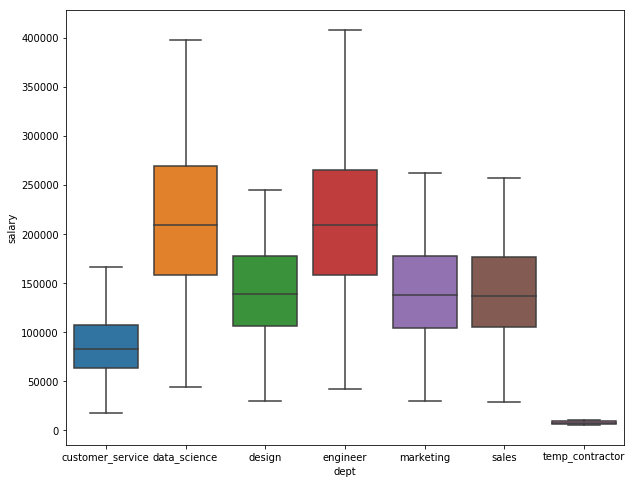

In [47]:
plt.figure(figsize=(10,8))
dept= list(set(data['dept']))
dept.sort()

sns.boxplot(data=data, x="dept", y="salary", order= dept)

## Salary by Seniority

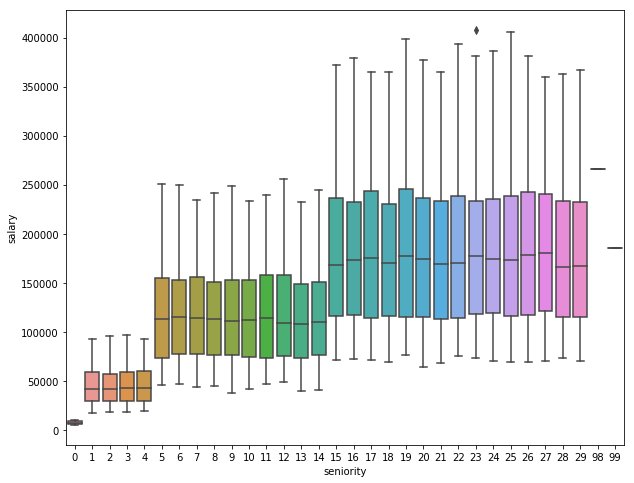

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x="seniority", y= "salary")

## Salary distribution across Seniority and Company

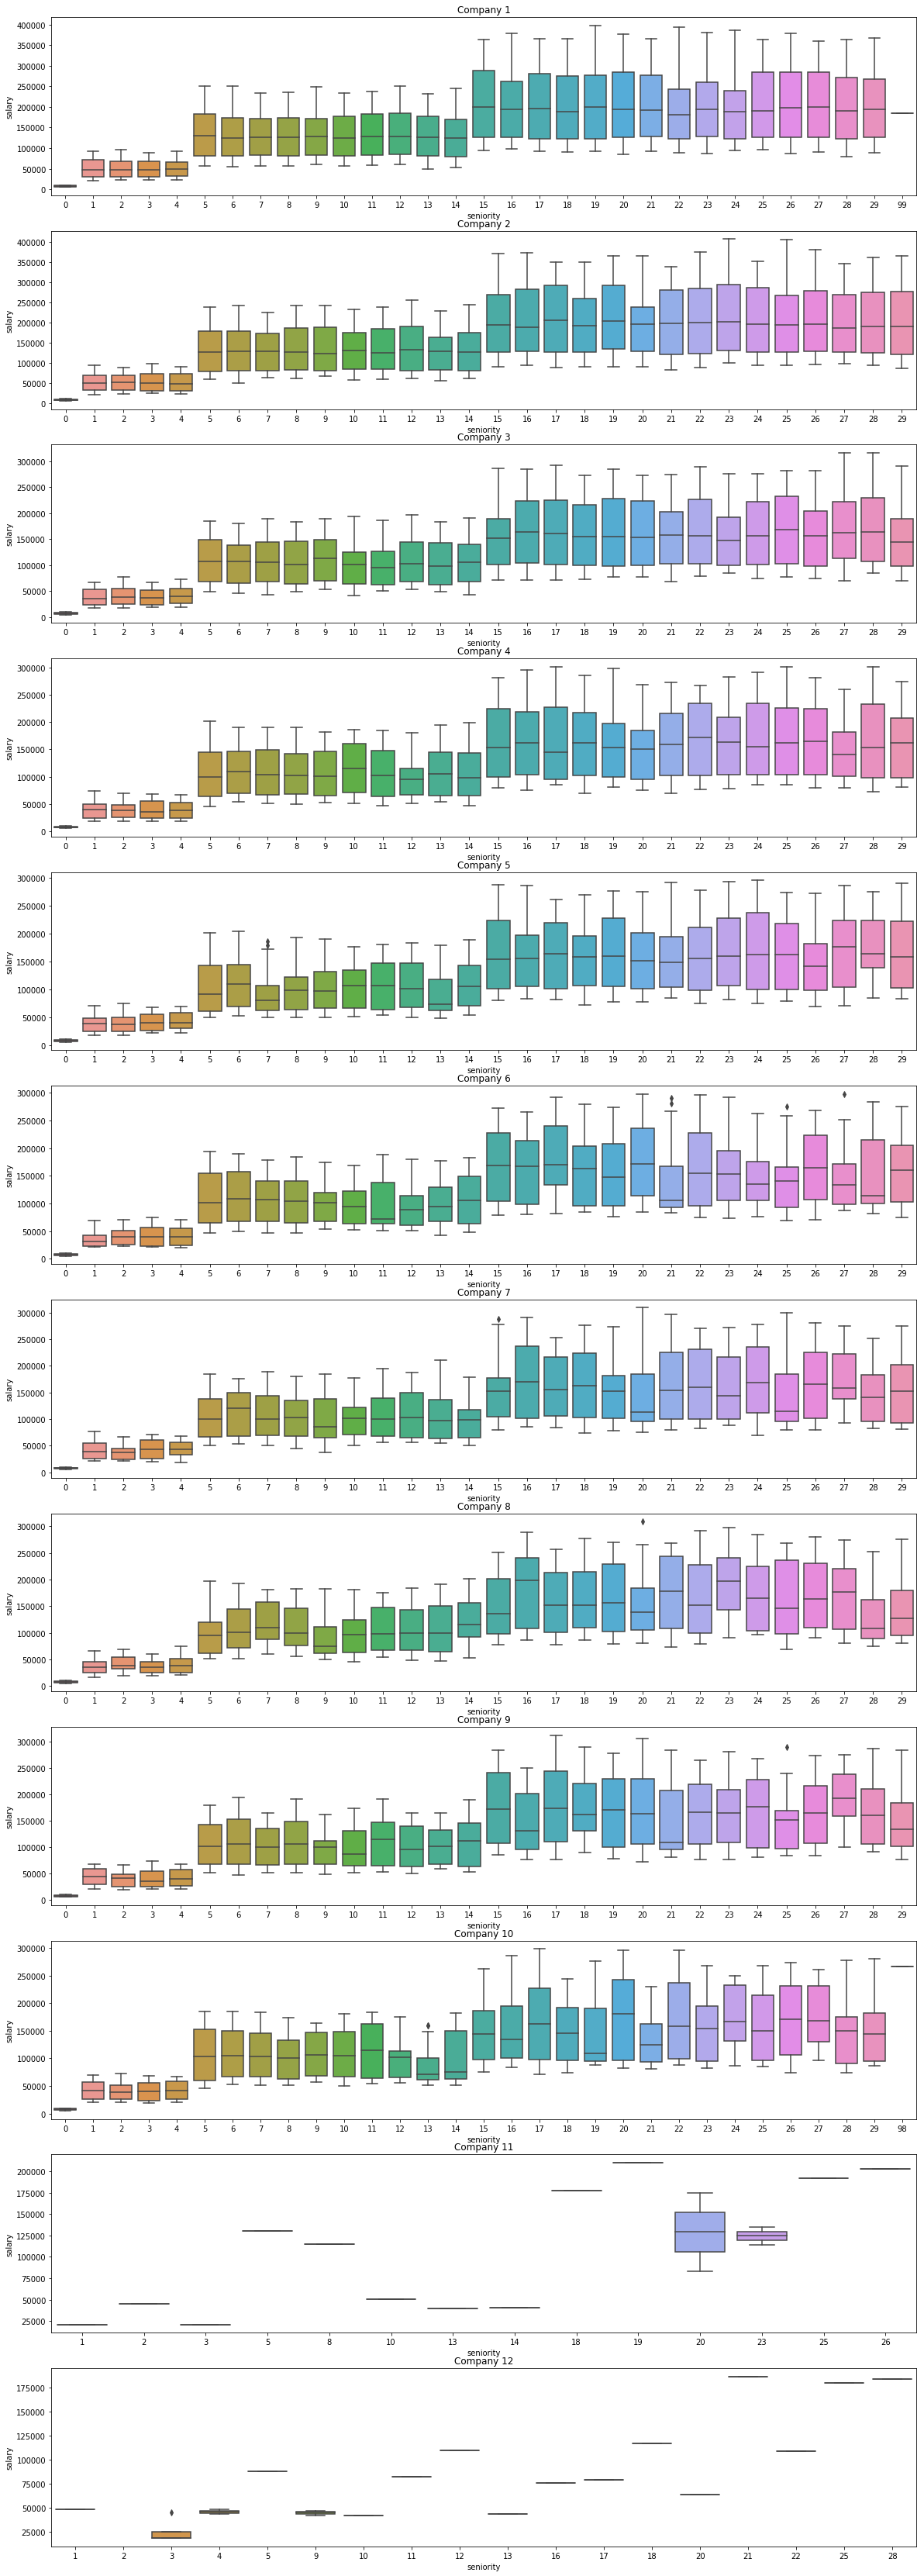

In [57]:
plt.figure(figsize=(20,60))
sns.boxplot(data=data, x = "seniority", y="salary")
for i in range(12):
    plt.subplot(12,1,i+1)
    sns.boxplot(data=data[data['company_id']== i+1], x="seniority", y="salary")
    plt.title("Company {}".format(i+1))

## Salary across Department and Companies

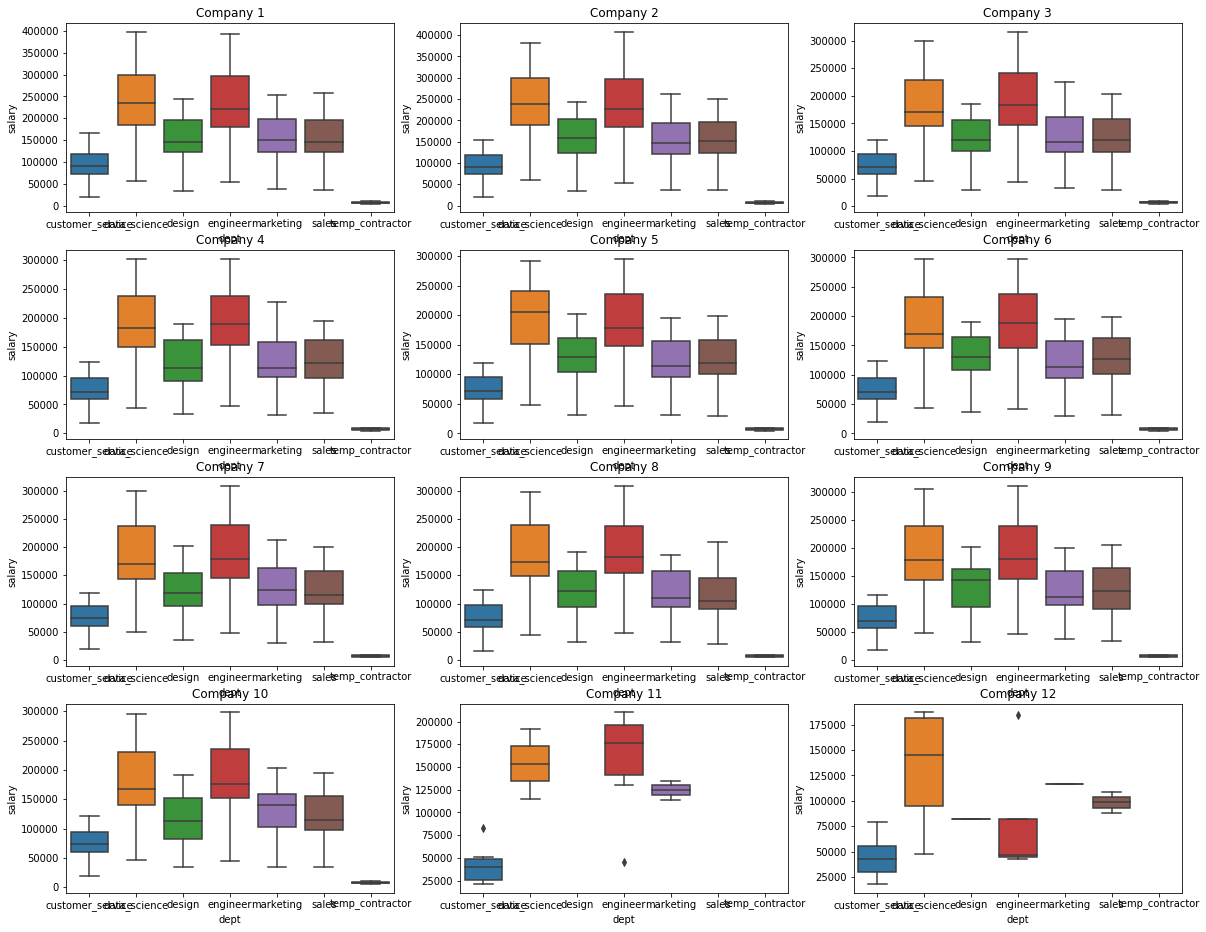

In [58]:
plt.figure(figsize=(20,16))
dept = list(set(data['dept']))
dept.sort()
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=data[data['company_id']==i+1], x="dept", y="salary", order=dept)
    plt.title("Company {}".format(i+1))

## How many employees are there in each company?

Text(0.5, 1.0, 'Number of Employees at Each Company')

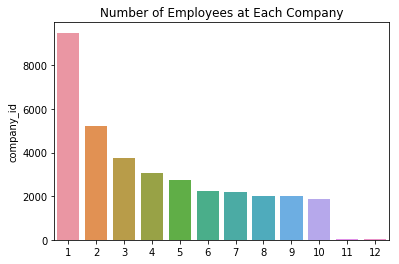

In [67]:
sns.barplot(x=list(range(1,13)), y= data.company_id.value_counts())
plt.title("Number of Employees at Each Company")


# Insights from EDA
    - Salary distribution is delineated by three buckets (0-4, 5-14, and 15-29)
    - Companies 1 and 2 offer the highest salaries
    - Salary distribution by department is consistent across companies
    - Data scientists + Engineers have the highest salaries// customer service, the lowest
    - Company 1 has the most employees (9501)